# Zaimportowanie danych oraz bibliotek

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Wczytanie danych: 

In [2]:
# Wczytanie danych zbioru train oraz test do zmiennych:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Wyświetlenie bazowych informacji o zbiorach: 

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Liczba próbek w zbiorze train wynosi: {}.'.format(train_df.shape[0]))

Liczba próbek w zbiorze train wynosi: 891.


In [5]:
# preview test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('Liczba próbek w zbiorze test wynosi: {}.'.format(test_df.shape[0]))

Liczba próbek w zbiorze test wynosi: 418.


# Ocena jakości zbioru danych oraz sprawdzenie brakujących wartości

In [7]:
# sprawdzenie brakujących wartości w zbiorze train
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Kolumna wiek

In [8]:
# wyświetlenie procentu brakujących wartości kolumny age
print('Procent brakujących wartości dla kolumny Age wynosi: %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Procent brakujących wartości dla kolumny Age wynosi: 19.87%


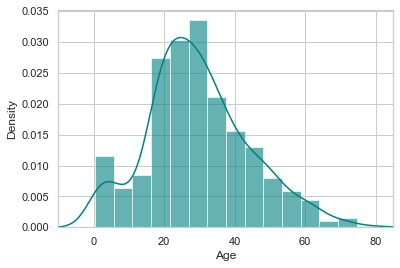

In [9]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Jak widać na wykresie - jest on prawostronnie przekrzywiony, w tym celu wykorzystam medianą do przypisania brakujących wartości zamiast średniej (użycie średniej może dać tendencyjne wyniki).

In [10]:
print('Średnia dla wieku wynosi: %.2f' %(train_df["Age"].mean(skipna=True)))
print('Mediana dla wieku wynosi: %.2f' %(train_df["Age"].median(skipna=True)))

Średnia dla wieku wynosi: 29.70
Mediana dla wieku wynosi: 28.00


## Kolumna Cabin

In [11]:
# wyświetlenie procentu brakujących wartości kolumny Cabin
print('Procent brakujących wartości dla kolumny Cabin wynosi: %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Procent brakujących wartości dla kolumny Cabin wynosi: 77.10%


Jak widać - w naszym zbiorze danych brakuje ponad 77% danych. Oznacza to, iż wykorzystanie tej kolumny dla procesu przewidywania nie jest zbyt rozsądna, stąd też w moim modelu zignoruję tą kolumnę.

## Kolumna Embarked

In [12]:
# wyświetlenie procentu brakujących wartości kolumny Embarked
print('Procent brakujących wartości dla kolumny Embarked wynosi: %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Procent brakujących wartości dla kolumny Embarked wynosi: 0.22%


Brakuje tylko 0.22% wartości dla kolumny Embarked, stąd też mogę do nich przypisać port, w którym większość pasażerów wsiadała na statek.

Liczba pasażerów pogrupowanych według portu, w którym wsiedli na statek (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


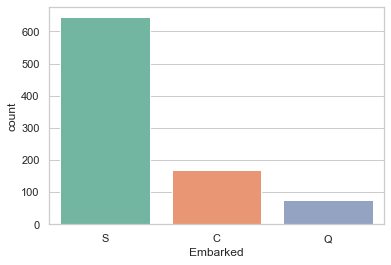

In [13]:
print('Liczba pasażerów pogrupowanych według portu, w którym wsiedli na statek (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

Jak widać na powyższym diagramie - najpopularniejszym portem jest port S (Southampton).

## Korekta do zbioru danych

Na podstawie wcześniejszej oceny zbioru danych postanowiłem dokonać następujących zmian na moim zbiorze:
- w przypadku brakujących wartości dla kolumny Age przypiszę medianę (28),
- dla brakujących rekordów kolumny Embarked przypisana zostaje wartość S,
- w przypadku kolumny Cabin brakuje zbyt dużo wartości, w związku z czym najrozsądniejszą opcją jest tutaj zignorowanie jej w moim modelu.

In [14]:
train_data = train_df.copy() # kopiowanie zbioru 
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True) # zastąpienie brakujących rekordów kolumny Age wartością 28
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True) # zastąpienie brakujących rekordów kolumny Embarked wartością S
train_data.drop('Cabin', axis=1, inplace=True) # usunięcie kolumny Cabin

In [15]:
# sprawdzenie, czy po dokonanych zmianach istnieją brakujące wartości w kolumnach
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# podgląd dostosowanych zmian
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


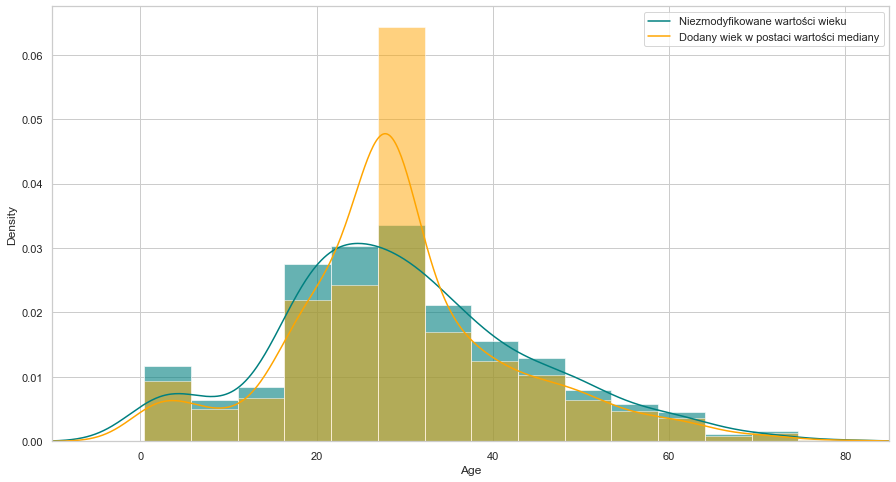

In [17]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Niezmodyfikowane wartości wieku', 'Dodany wiek w postaci wartości mediany'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Na powyższym wykresie można zauważyć, jak zmieniają się wartości wieku po uzupełnieniu brakujących rekordów wartościami w postaci mediany.

## Dodatkowe zmienne

Dla uproszczenia (i aby uwzględnić możliwą wielowspółliniowość), połączę wpływ zmiennych SibSp i Parch  w jeden predyktor kategoryczny: czy dana osoba podróżowała sama, czy nie

In [18]:
## Utworzenie zmiennych pomocniczych do podróżowania samemu
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

Utworzę również zmienne kategoryczne dla klasy pasażera, płci i portu:

In [19]:
# create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


Opisane zmiany, które zastosowałem na zbiorze Train, wprowadzę również na zbiorze testowym:
- jeśli brakuje wartości dla kolumny Age to przypiszę wartość 28,
- usunę kolumnę „Cabine” z danych testowych, ponieważ postanowiłem nie uwzględniać jej w mojej analizie,
- nie było brakujących wartości dla kolumny Embarked.

Zostały dodane przeze mnie zmienne fikcyjne, aby sfinalizować zestaw testowy.

Na koniec przypisuję 1 jako brakującą wartość dla kolumny Fare z medianą 14,45.

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# Eksploracyjna analiza danych

## Analiza wieku ('Age')

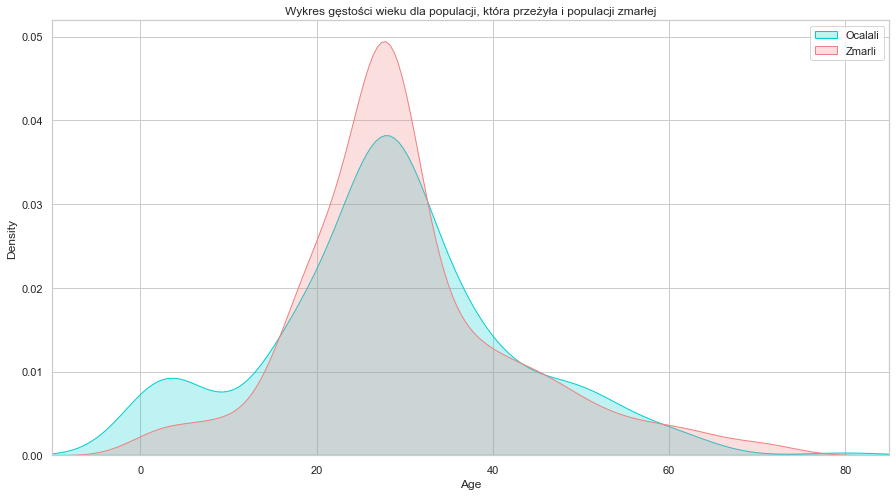

In [22]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Ocalali', 'Zmarli'])
plt.title('Wykres gęstości wieku dla populacji, która przeżyła i populacji zmarłej')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Rozkład wieku dla ocalałych i zmarłych jest w rzeczywistości bardzo podobny. Jedna godna uwagi różnica polega na tym, że wśród ocalałych większy odsetek stanowiły dzieci. Pasażerowie najwyraźniej podjęli próbę ratowania dzieci, dając im miejsce na tratwach ratunkowych.

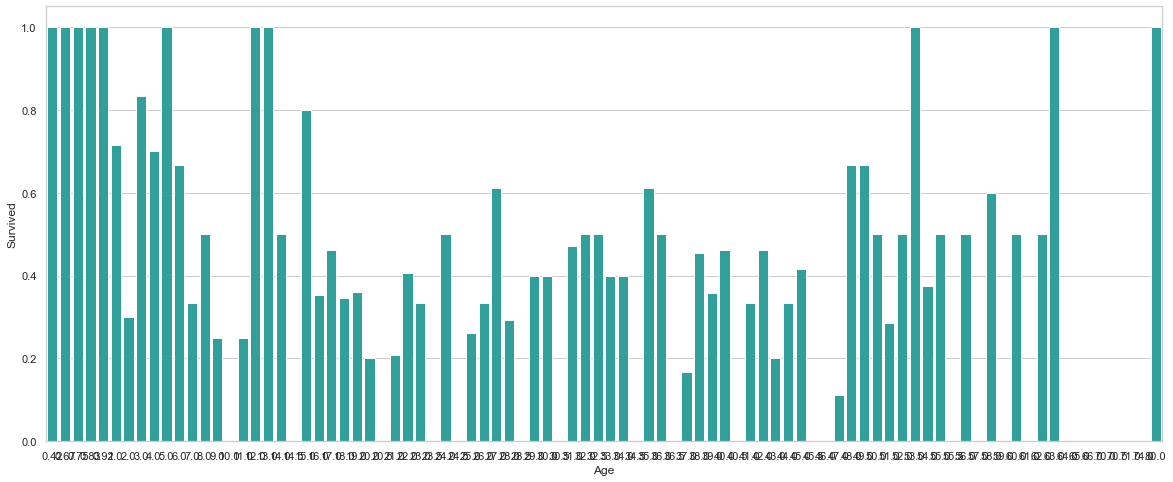

In [23]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

Biorąc pod uwagę wskaźnik przeżycia pasażerów poniżej 16 roku życia, w moim zbiorze danych uwzględnię również inną zmienną: „Minor”.

In [24]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

## Analiza kolumny opłaty za bilet ('Fare')

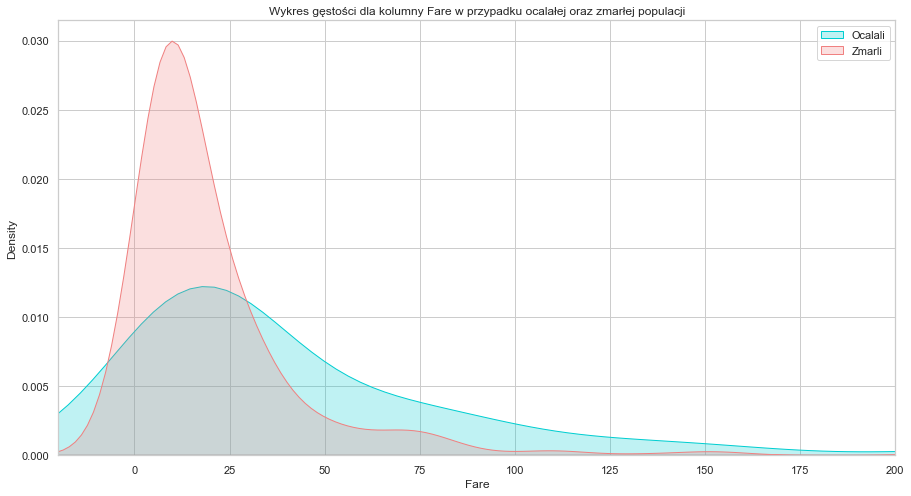

In [25]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Ocalali', 'Zmarli'])
plt.title('Wykres gęstości dla kolumny Fare w przypadku ocalałej oraz zmarłej populacji')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

Ponieważ rozkłady są wyraźnie różne dla kolumny Fare w przypadku populacji ocalałej i zmarłej, jest prawdopodobne, że byłby to znaczący predyktor w naszym ostatecznym modelu. Wydaje się, że pasażerowie, którzy zapłacili niższą opłatę za przejazd, mieli mniejsze szanse na przeżycie. Jest to prawdopodobnie silnie skorelowane z klasą pasażerską, która została później przeanalizowana.

## Analiza klasy pasażerskiej ('PClass')

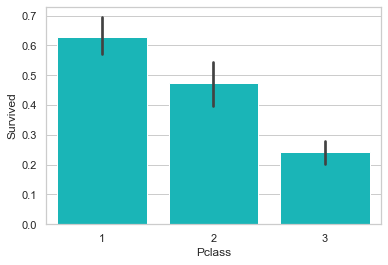

In [26]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

Jak widać - największy odsetek ocalałych osób znajdował się w klasie pierwszej. Nie jest to nic dziwnego - osoby z tej klasy miały pierwszeństwo podczas ewakuacji.

## Analiza portu ('Embarked')

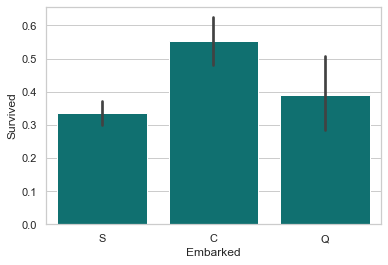

In [27]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

Na podstawie powyższego diagramu można wysnuć następujące wnioski: 
- pasażerowie, którzy weszli na pokład w Cherbourgu we Francji, wydają się mieć najwyższy wskaźnik przeżywalności, 
- pasażerowie, którzy weszli na pokład w Southhampton, mieli marginalne mniejsze szanse na przeżycie niż ci, którzy weszli na pokład w Queenstown. Jest to prawdopodobnie związane z klasą pasażerów, a może nawet z kolejnością przydzielania pokoi (np. może wcześniej pasażerowie częściej mieli pokoje bliżej pokładu).

Warto również zwrócić uwagę na wielkość wąsów na tych wykresach. Ponieważ liczba pasażerów, którzy weszli na pokład w Southhampton, była najwyższa, zaufanie do wskaźnika przeżycia jest najwyższe. Wąs na wykresie dla portu Queenstown zawiera średnią z Southhampton, a także dolną granicę jego wąsów.

## Analiza podróżowania samemu a z rodziną ('TravelAlone')

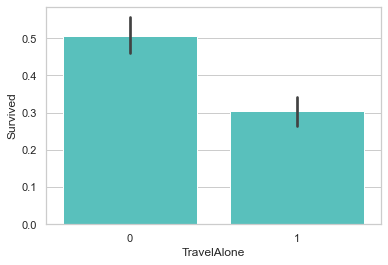

In [28]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

Osoby podróżujące bez rodziny były bardziej narażone na śmierć w katastrofie niż osoby z rodziną na pokładzie. Biorąc pod uwagę datę katastrofy (1912 rok), prawdopodobne jest to, iż osoby podróżujące samotnie były mężczyznami.

## Analiza płci ('Gender')

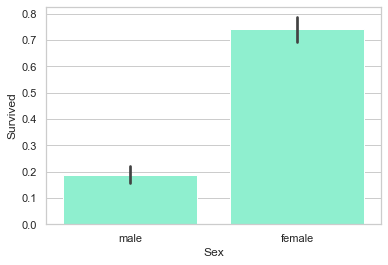

In [29]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

To bardzo oczywista różnica. Bycie kobietą znacznie zwiększało szanse na przeżycie.

# Regresja logistyczna oraz rezultaty

## Wybór właściwości

### Rekursywna eliminacja funkcji (ang. recursive feature elimination)

Biorąc pod uwagę zewnętrzny estymator, który przypisuje wagi do cech, rekursywna eliminacja cech (RFE) polega na wybieraniu cech przez rekurencyjne uwzględnianie coraz mniejszych zestawów cech. Po pierwsze, estymator jest szkolony w zakresie początkowego zestawu cech, a ważność każdej cechy jest uzyskiwana albo poprzez atrybut coef_, albo poprzez atrybut feature_importances_. Następnie najmniej ważne cechy są usuwane z bieżącego zestawu cech. Ta procedura jest powtarzana rekurencyjnie na zestawie przyciętym, aż w końcu zostanie osiągnięta pożądana liczba cech do wybrania.

Źródło: http://scikit-learn.org/stable/modules/feature_selection.html

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Budowanie logreg oraz obliczanie wagi feature
model = LogisticRegression()
# utworzenie modelu RFE oraz wybranie 8 atrybutów
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# podsumowanie wybrania atrybutów
print('Wybrane cechy: %s' % list(X.columns[rfe.support_]))

Wybrane cechy: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


### Właściwość 'ranking' z rekurencyjną eliminacją cech i walidacją krzyżową

RFECV wykonuje RFE w pętli walidacji krzyżowej, aby znaleźć optymalną liczbę lub najlepszą liczbę funkcji. Rekursywna eliminacja cech stosowana jest w regresji logistycznej z automatycznym dostrajaniem liczby cech wybranych za pomocą walidacji krzyżowej.

Optymalna liczba wybranych cech: 9
Wybrane cechy: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


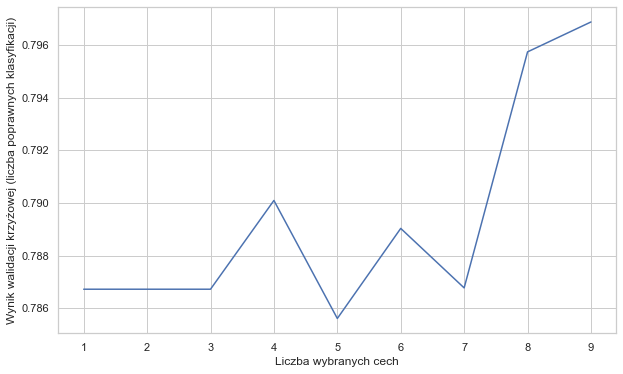

In [31]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optymalna liczba wybranych cech: %d" % rfecv.n_features_)
print('Wybrane cechy: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Wynik walidacji krzyżowej (liczba poprawnych klasyfikacji)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Jak widać - zachowanych zostało 8 zmiennych.

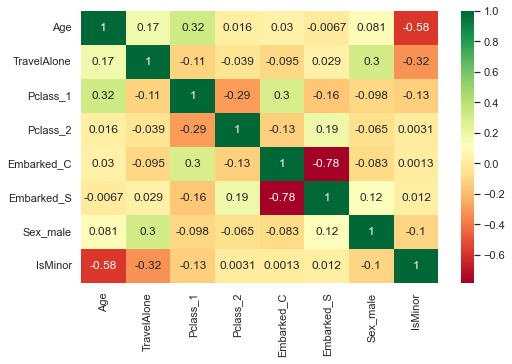

In [32]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Przegląd procedur oceny modeli

Najlepszym rozwiązaniem okazał się być podział na zbiór uczący oraz uczony.

W tym celu podzieliłem zbiór danych na dwie części, aby model mógł być trenowany i testowany na różnych danych
Dokładność testowania jest lepszym oszacowaniem niż dokładność treningu wyników poza próbą

Ten rodzaj modelu zapewnia wysokie oszacowanie wariancji, ponieważ zmiana obserwacji znajdujących się w zestawie testowym może znacząco zmienić dokładność testowania.
Dokładność testowania może się bardzo zmienić w zależności od tego, która obserwacja znajduje się w zestawie testowym.

### Ocena modelu w oparciu o prosty podział pociąg/test przy użyciu funkcji train_test_split()

Wyniku podziału Train/Test:
LogisticRegression dokładność wynosi: 0.782
LogisticRegression utrata logarytmiczna wynosi: 0.504
LogisticRegression auc wynosi 0.838


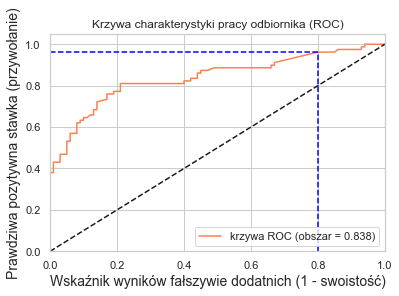

Stosując próg 0.070 gwarantuje wrażliwość 0.962 i specyfikę 0.200, wliczając fałszywie dodatni wskaźnik 80.00%.


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# utworzenie zmiennej X (cechy) i y (odpowiedzi)
X = final_train[Selected_features]
y = final_train['Survived']

# wykorzystanie train/test z losowymi wartościami
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# sprawdzenie wyniku klasyfikacji regresji logistycznej
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Wyniku podziału Train/Test:')
print(logreg.__class__.__name__+" dokładność wynosi: %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" utrata logarytmiczna wynosi: %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc wynosi %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # indeks pierwszego progu, dla którego czułość jest większa niż 0,95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='krzywa ROC (obszar = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Wskaźnik wyników fałszywie dodatnich (1 - swoistość)', fontsize=14)
plt.ylabel('Prawdziwa pozytywna stawka (przywołanie)', fontsize=14)
plt.title('Krzywa charakterystyki pracy odbiornika (ROC)')
plt.legend(loc="lower right")
plt.show()

print("Stosując próg %.3f " % thr[idx] + "gwarantuje wrażliwość %.3f " % tpr[idx] +  
      "i specyfikę %.3f" % (1-fpr[idx]) + 
      ", wliczając fałszywie dodatni wskaźnik %.2f%%." % (np.array(fpr[idx])*100))

### Ocena modelu na podstawie walidacji krzyżowej K-krotnej przy użyciu funkcji cross_val_score()

In [34]:
# 10-krotna regresja logistyczna z walidacją krzyżową
logreg = LogisticRegression()
# Wykorzystanie funkcji cross_val_score
# Przekazuję całość X i y, a nie X_train czy y_train, to zajmuje się dzieleniem danych
# cv=10 dla 10 kroków
# rezultaty = {'accuracy', 'neg_log_loss', 'roc_auc'} dla miernika oceny - choć jest ich wiele
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-krotne wyniki walidacji krzyżowej:')
print(logreg.__class__.__name__+" średnia dokładność to %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" średnia log_loss to %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" średnia auc to %2.3f" % scores_auc.mean())

K-krotne wyniki walidacji krzyżowej:
LogisticRegression średnia dokładność to 0.796
LogisticRegression średnia log_loss to 0.454
LogisticRegression średnia auc to 0.850


### Ocena modelu na podstawie walidacji krzyżowej K-krotnej przy użyciu funkcji cross_validate()

In [35]:
from sklearn.model_selection import cross_validate

scoring = {'dokładność': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-krotne wyniki walidacji krzyżowej:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" średnia %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-krotne wyniki walidacji krzyżowej:
LogisticRegression średnia dokładność: 0.796 (+/-0.024)
LogisticRegression średnia log_loss: 0.454 (+/-0.037)
LogisticRegression średnia auc: 0.850 (+/-0.028)


## GridSearchCV - ocenianie przy jednoczesnym użyciu wielu punktów 

Najlepsze parametry: LogisticRegression(C=2.4000100000000004)
Najlepsze parametry: {'C': 2.4000100000000004}
Najlepszy wynik: 0.8069662921348316


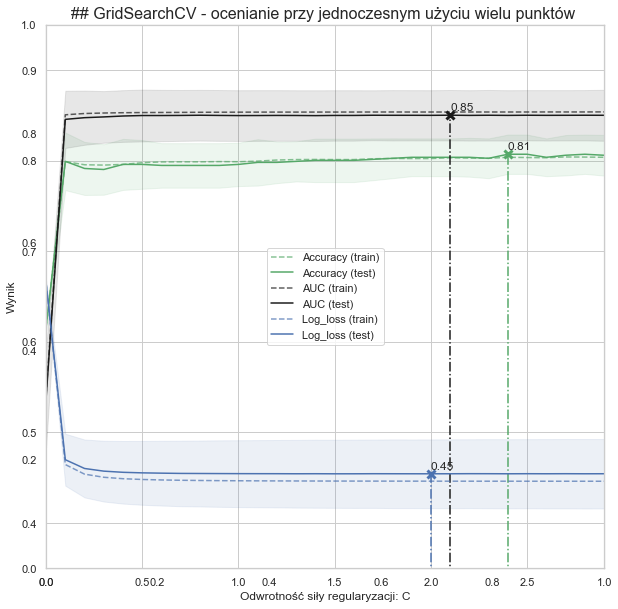

In [36]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("Najlepsze parametry: " + str(gs.best_estimator_))
print("Najlepsze parametry: " + str(gs.best_params_))
print('Najlepszy wynik:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("## GridSearchCV - ocenianie przy jednoczesnym użyciu wielu punktów ",fontsize=16)

plt.xlabel("Odwrotność siły regularyzacji: C")
plt.ylabel("Wynik")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

# Podsumowanie

Na podstawie uzyskanych wyników można wysnuć następujące wnioski:
- płeć pasażerów miała znaczący wpływ na ich przeżywalność: bycie kobietą zwiększało szanse na przeżycie,
- osoby podróżujące z rodziną miały większą szansę na ocalenie niż osoby podróżujące samotnie,
- port, z którego na pokład weszli pasażerowie, miał pośredni wpływ na to, czy dana osoba przeżyje,
- klasa pasażerska miała znaczący wpływ na to, czy dana osoba ocaleje (bycie w pierwszej klasie zwiększało szansę przeżycia),
- wiek pasażerów był również istotny. Wśród ocalałych większy odsetek stanowiły dzieci. Pasażerowie najwyraźniej podjęli próbę ratowania dzieci, dając im miejsce na tratwach ratunkowych.